In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('TrainData/train_data64.csv')
df.head()

,playernumberofstones,opponentnumberofstones,playernumberofhands,opponentnumberofhands,playersettledstone,opponentsettledstone,playerdangeroushands,opponentdangeroushands,playercellpoints,opponentcellpoints,evaluation_value
0,45,19,0,0,45,19,0,0,-77,-27,26
1,24,40,0,0,24,40,0,0,-32,-72,-16
2,21,43,0,0,21,43,0,0,5,-109,-22
3,35,29,0,0,35,29,0,0,-44,-60,6
4,25,39,0,0,25,39,0,0,-78,-26,-14


In [44]:
df.shape

(331, 11)

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df.iloc[:, :-1])
sc_df = pd.DataFrame(sc.transform(df.iloc[:, :-1]))
sc_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.614353,-1.614353,0.0,0.0,1.614353,-1.614353,0.0,0.0,-1.087279,1.087279
1,-0.295342,0.295342,0.0,0.0,-0.295342,0.295342,0.0,0.0,0.164268,-0.164268
2,-0.568155,0.568155,0.0,0.0,-0.568155,0.568155,0.0,0.0,1.193318,-1.193318
3,0.704974,-0.704974,0.0,0.0,0.704974,-0.704974,0.0,0.0,-0.169478,0.169478
4,-0.204404,0.204404,0.0,0.0,-0.204404,0.204404,0.0,0.0,-1.115091,1.115091


In [46]:
from sklearn.model_selection import train_test_split

sc_X = sc_df.iloc[:, :].values
sc_y = df.iloc[:, -1].values
#再現性や後の検討を考えてrandom_stateは指定しておくことがおすすめ 
sc_X_train, sc_X_test, sc_y_train, sc_y_test = train_test_split(sc_X, sc_y, test_size=0.3, random_state=1)

#データの分割を確認
print("分割後のデータ")
print(sc_X.shape)
print(sc_X_train.shape)
print(sc_X_test.shape)

分割後のデータ
(331, 10)
(231, 10)
(100, 10)


In [47]:
from sklearn.linear_model import LinearRegression

reg_lr = LinearRegression()
# 訓練データにモデルを適用する
reg_lr.fit(sc_X_train,sc_y_train)
LinearRegression(fit_intercept=True)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
reg_lr.coef_
# 重みをデータフレームとして表示
coef = reg_lr.coef_
df_coef = pd.DataFrame(coef).T
df_coef.columns = df.columns[:-1]
df_coef.index = ["Estimated coefficients"]
df_coef = df_coef.round(2)
df_coef

,playernumberofstones,opponentnumberofstones,playernumberofhands,opponentnumberofhands,playersettledstone,opponentsettledstone,playerdangeroushands,opponentdangeroushands,playercellpoints,opponentcellpoints
Estimated coefficients,5.5,-5.5,0.0,0.0,5.5,-5.5,0.0,0.0,0.0,-0.0


In [49]:
reg_lr.intercept_

-9.50453172205438

In [50]:
print(sc_y)
print(sc_X)

[ 26 -16 -22   6 -14 -20  14 -22  14 -16 -12 -18 -30  18  14 -26  -2  -4
   8  24  10 -28 -10   6   0 -10 -18   4   6 -22   0  -2 -20   8 -46  28
 -40 -30 -14 -22  12 -64 -34 -26 -52 -28 -12 -20   4   6  14 -18 -18 -28
  10  18 -46 -22 -28 -32 -34   2 -28   0 -30  10 -16 -18 -14 -22 -44 -18
 -24  28 -42  30  30   2 -38  -8 -32 -34  -6 -18 -10   4 -18  10 -12  14
  -8 -14 -46  18 -38 -38 -18 -16 -40 -16 -12 -48  -6  -2 -24 -34 -16   2
   0   8 -10  22  32 -20 -52 -40 -24  38  20 -24 -14 -46 -22  -6 -22 -10
   0   8  -6 -40   4 -38  -4 -38 -24 -44  34  14 -26 -54  32  22 -60   4
  40 -38  12 -14 -18  -8 -24 -42   0 -14 -26 -12 -12   6 -22   2 -26  -2
   4 -24 -24 -40 -18  -4 -42 -40  26 -36  26   2 -12 -24  -8   4   2 -16
  18 -10  40  18 -42 -22 -26   6 -48  -8 -46  -8   0   2  10 -20 -20 -10
 -26 -14 -16 -12 -16 -42 -34   2   2 -44   0  32  16  26   4 -16   6 -18
  -8 -22 -16 -20  34 -30 -22  12  44 -10 -28  -2 -36  40 -28   4  34 -22
  -6  28  10  34  -6 -26 -42 -22   4 -18  10  16 -2

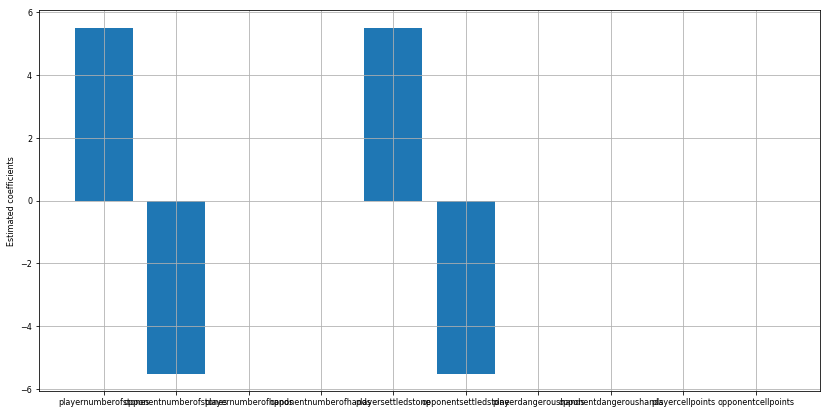

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# パラメータ数を定義しておく
num = len(df_coef.columns)
# グラフの大きさを設定
plt.figure(figsize=(14, 7))
# 文字の大きさを設定
plt.rcParams["font.size"] = 8
# 棒グラフの設定plt.bar(x,height)
plt.bar(df_coef.columns, coef)
#plt.xtickes(分割数,割り当てるラベル)
plt.xticks(np.arange(num),df_coef.columns)
plt.ylabel("Estimated coefficients")
plt.grid()
plt.show()

In [60]:
reg_lr.score(sc_X_test,sc_y_test)
print('{:.3f}'.format(reg_lr.score(sc_X_test,sc_y_test)))

1.000


In [61]:
from sklearn.metrics import mean_squared_error
train_pred = reg_lr.predict(sc_X_train)
train_mse = mean_squared_error(y_true=sc_y_train , y_pred=train_pred)
print("訓練データのMSE：" + '{:.1f}'.format(train_mse))
print("訓練データのRMSE：" + '{:.1f}'.format(np.sqrt(train_mse)))
test_pred = reg_lr.predict(sc_X_test)
test_mse = mean_squared_error(y_true=sc_y_test , y_pred=test_pred)
print("テストデータのMSE：" + '{:.1f}'.format(test_mse))
print("テストデータのRMSE：" + '{:.1f}'.format(np.sqrt(test_mse)))

訓練データのMSE：0.0
訓練データのRMSE：0.0
テストデータのMSE：0.0
テストデータのRMSE：0.0


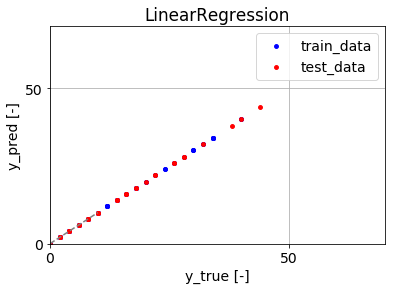

In [62]:
x = np.linspace(0, 10, 900)

plt.rcParams["font.size"] = 14
plt.scatter(x=sc_y_train, y=train_pred, s=15, label='train_data', color="b")
plt.scatter(x=sc_y_test, y=test_pred, s=15, label='test_data',color="r")
plt.plot(x, x, color="gray", linestyle="--")
plt.title("LinearRegression")
plt.xlabel("y_true [-]")
plt.ylabel("y_pred [-]")
plt.xlim(0, 70)
plt.ylim(0, 70)
plt.xticks(np.arange(0,100,50))
plt.yticks(np.arange(0,100,50))
plt.grid()
plt.legend()
plt.show()

In [63]:
print("mean")
print(sc.mean_)
print("variance")
print(sc.var_)
print("coef")
print(coef)
print("intercept")
print(reg_lr.intercept_)

mean
[ 27.24773414  36.75226586   0.           0.          27.24773414
  36.75226586   0.           0.         -37.90634441 -66.09365559]
variance
[ 120.92352206  120.92352206    0.            0.          120.92352206
  120.92352206    0.            0.         1292.79787516 1292.79787516]
coef
[ 5.49826159e+00 -5.49826159e+00  0.00000000e+00  0.00000000e+00
  5.49826159e+00 -5.49826159e+00  0.00000000e+00  0.00000000e+00
  1.07652603e-15 -1.52061524e-15]
intercept
-9.50453172205438


In [64]:
ret_coef = [0]*(len(sc.mean_)+1)
ret_coef[-1] += reg_lr.intercept_
for i in range(len(ret_coef)-1):
    ret_coef[-1] -= coef[i]*sc.mean_[i]/np.sqrt(sc.var_[i])
for i in range(len(ret_coef)-1):
    ret_coef[i] = coef[i]/np.sqrt(sc.var_[i])
print(ret_coef)


[0.49999999999999994, -0.49999999999999983, nan, nan, 0.49999999999999994, -0.49999999999999994, nan, nan, 2.994051195935357e-17, -4.229159115170073e-17, nan]


/Users/oogamitakuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/oogamitakuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [65]:
'''AssertionErrorret_coef = [0]*(len(sc.mean_))
ret_coef[-1] += reg_lr.intercept_
for i in range(len(ret_coef)-1):
    ret_coef[-1] -= coef[i]*sc.mean_[i]/np.sqrt(sc.var_[i])
for i in range(len(ret_coef)-1):
    ret_coef[i] = coef[i]/sc.var_[i]
print(ret_coef)'''


'AssertionErrorret_coef = [0]*(len(sc.mean_))\nret_coef[-1] += reg_lr.intercept_\nfor i in range(len(ret_coef)-1):\n    ret_coef[-1] -= coef[i]*sc.mean_[i]/np.sqrt(sc.var_[i])\nfor i in range(len(ret_coef)-1):\n    ret_coef[i] = coef[i]/sc.var_[i]\nprint(ret_coef)'

In [69]:
qt = 10
print(df.values[:qt,:])
for j in range(qt):
    val = 0
    val2 = 0
    for i in range(len(df.values[j])-1):
        print(df.values[j][i])
        val += ret_coef[i]*df.values[j][i]
        val2 += coef[i]*df.values[j][i]
    print(val + ret_coef[-1])
    print(val2 + reg_lr.intercept_)

[[  45   19    0    0   45   19    0    0  -77  -27   26]
 [  24   40    0    0   24   40    0    0  -32  -72  -16]
 [  21   43    0    0   21   43    0    0    5 -109  -22]
 [  35   29    0    0   35   29    0    0  -44  -60    6]
 [  25   39    0    0   25   39    0    0  -78  -26  -14]
 [  22   42    0    0   22   42    0    0  -26  -78  -20]
 [  39   25    0    0   39   25    0    0   21 -125   14]
 [  21   43    0    0   21   43    0    0 -101   -3  -22]
 [  39   25    0    0   39   25    0    0  -28  -76   14]
 [  24   40    0    0   24   40    0    0  -41  -63  -16]]
45
19
0
0
45
19
0
0
-77
-27
nan
276.40507096731903
24
40
0
0
24
40
0
0
-32
-72
nan
-185.44890260782245
21
43
0
0
21
43
0
0
5
-109
nan
-251.4280416899855
35
29
0
0
35
29
0
0
-44
-60
nan
56.47460736010879
25
39
0
0
25
39
0
0
-78
-26
nan
-163.45585624710162
22
42
0
0
22
42
0
0
-26
-78
nan
-229.43499532926455
39
25
0
0
39
25
0
0
21
-125
nan
144.44679280299312
21
43
0
0
21
43
0
0
-101
-3
nan
-251.42804168998578
39
25
0
0